# Clasificarea imaginilor cu fete in functie de emotia sugerata (angry, disgust, fear, happy, neutral, sad, surprise)

### Pasul 1 - incarcarea datelor si afisarea distributiei lor

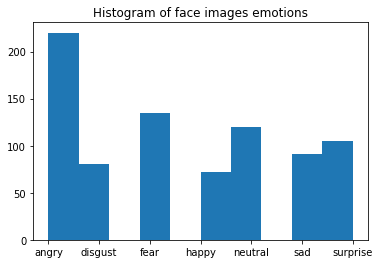

In [1]:
from utils import *

inputs, outputs = load_face_images_arrays()

plot_data_histograms(outputs, 'face images emotions')

### Pasul 2 - Extragerea caracteristicilor

In [2]:
inputs = [extract_features(input) for input in inputs]

### Pasul 3 - Impartirea datelor in date de antrenament si date de validare si normalizarea datelor

In [15]:
# impratirea datelor in date de antrenament si date de validare
train_inputs, train_outputs, validation_inputs, validation_outputs = split_data_into_training_and_validation(inputs, outputs, 0.8)
train_inputs = [train_input.tolist() for train_input in train_inputs]
validation_inputs = [validation_input.tolist() for validation_input in validation_inputs]

# normalizarea datelor
train_inputs, validation_inputs = normalisation(train_inputs, validation_inputs)

### Pasul 4 - Invatare model

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier = classifier.fit(train_inputs, train_outputs)

### Pasul 5 - Testarea datelor de validare

In [17]:
predicted_validation_outputs = classifier.predict(validation_inputs)

### Pasul 6 - Calculul acuratetii si afisarea matricei de confuzie

Accuracy: 0.21212121212121213


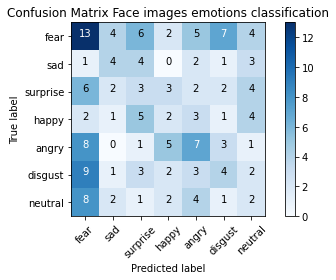

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

# calculul acuratetii
accuracy = accuracy_score(validation_outputs, predicted_validation_outputs)
print('Accuracy:', accuracy)

# afisarea matricei de confuzie
cm = confusion_matrix(validation_outputs, predicted_validation_outputs)
label_names = list(set(outputs))
plot_confusion_matrix(cm, label_names, 'Face images emotions classification')